In [2]:
import sys
import pandas as pd
import numpy as np
from numpy import *
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
if __name__ == "__main__":
    df = pd.read_csv("../dataset/baltimore_crimes.csv")
    CD = df['CrimeDate']
    CT = df['CrimeTime']
    unique_time = np.unique(CT)

In [4]:
result1 = {}
days = {1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
for uv in CD:
    splitDate = list(map(int,uv.split("/")))
    weak = datetime.date(splitDate[2], splitDate[0], splitDate[1]).isocalendar()
    if days[weak[2]] not in result1:
        result1[days[weak[2]]] = 0
    result1[days[weak[2]]] += 1

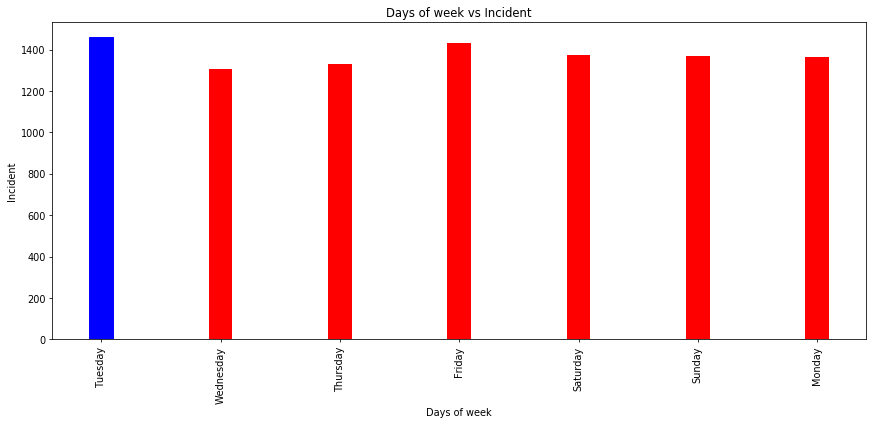

In [5]:
width = 1/5
plt.figure(num=None, figsize=(15, 6), dpi=70, facecolor='w', edgecolor='k')
barlist = plt.bar(result1.keys(), result1.values(), width, color="red")
barlist[0].set_color('b')
plt.xlabel('Days of week')
plt.ylabel('Incident')
plt.title('Days of week vs Incident')
plt.xticks(rotation='vertical')
plt.show()

In [6]:
result = {}
for i in unique_time:
    time = list(map(int,i.split(':')))
    if time[0] not in result and (time[0] < 23 and time[0] > 0):
        result[time[0]] = 0
for uv in CT:
    time = list(map(int,uv.split(':')))
    if time[0] < 23 and time[0] > 0:
        result[time[0]] += 1

In [7]:
res = {}
for index in range(1, len(df), 1):
    data = df.iloc[[index]]
    time = list(map(int,data['CrimeTime'].values[0].split(':')))[0]
    if (time >= 20 and time <= 23) and data['Description'].values[0] not in res:
        res[data['Description'].values[0]] = 0
    if (time >= 20 and time <= 23):
        res[data['Description'].values[0]] += 1

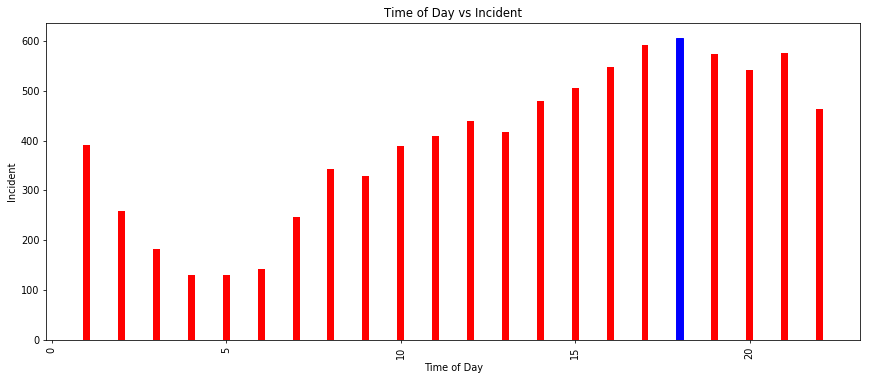

In [8]:
width = 1/5
plt.figure(num=None, figsize=(15, 6), dpi=70, facecolor='w', edgecolor='k')
barlist = plt.bar(result.keys(), result.values(), width, color="red")
barlist[-5].set_color('b')
plt.xlabel('Time of Day')
plt.ylabel('Incident')
plt.title('Time of Day vs Incident')
plt.xticks(rotation='vertical')
plt.show()

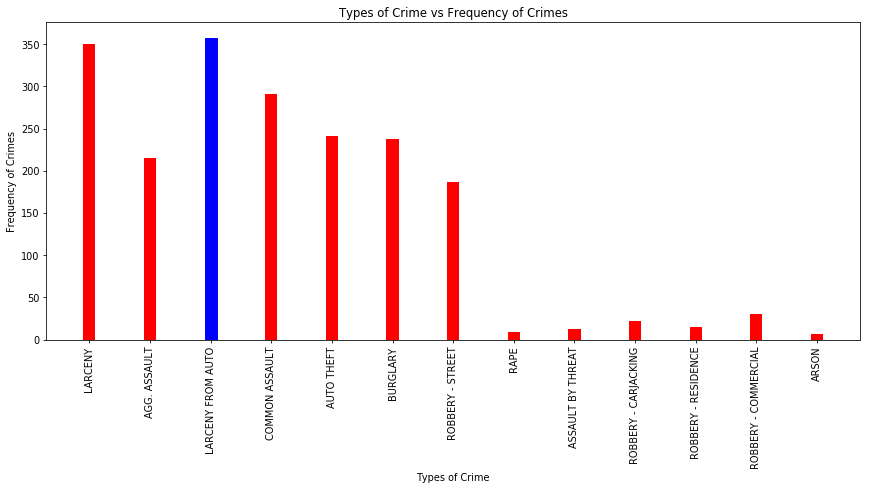

In [9]:
width = 1/5
plt.figure(num=None, figsize=(15, 6), dpi=70, facecolor='w', edgecolor='k')
barlist = plt.bar(res.keys(), res.values(), width, color="red")
barlist[2].set_color('b')
plt.xlabel('Types of Crime')
plt.ylabel('Frequency of Crimes')
plt.title('Types of Crime vs Frequency of Crimes')
plt.xticks(rotation='vertical')
plt.show()